In [1]:
import torch 
import json 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [2]:
plat_groups = pd.read_excel("/mnt/ncshare/ozkilim/BRCA/data/HGSOC_processed_data/plat_res_prots.xlsx",header=2)
upreg = plat_groups[plat_groups["Up / down in Pt-resistant cellsc"]=="UP"]
downreg = plat_groups[plat_groups["Up / down in Pt-resistant cellsc"]=="DOWN"]
down_reg_prots = downreg["HUGO Gene symbol"].to_list()
up_reg_prots = upreg["HUGO Gene symbol"].to_list()

with open("/mnt/ncshare/ozkilim/BRCA/HGSOC_platinum_responce/proteomics_combinations.json", 'r') as file:
	protein_sets = json.load(file)

protein_categories = protein_sets['IPS_pathways']
igs = torch.load("/mnt/ncshare/ozkilim/BRCA/heatmaps/IPS_pathways_heatmaps/heatmap_raw_results/HGSOC_MCAT_UAB_IPS_pathways/Unspecified/1009475_171118_ImageActual/attributions_ig.pt")
# igs=igs[1:]

dict_keys(['BIOCARTA_ATRBRCA_PATHWAY', 'HALLMARK_DNA_REPAIR', 'KEGG_BASE_EXCISION_REPAIR', 'KEGG_HOMOLOGOUS_RECOMBINATION', 'KEGG_MISMATCH_REPAIR', 'KEGG_NON_HOMOLOGOUS_END_JOINING', 'KEGG_NUCLEOTIDE_EXCISION_REPAIR', 'REACTOME_BASE_EXCISION_REPAIR', 'REACTOME_BASE_EXCISION_REPAIR_AP_SITE_FORMATION', 'REACTOME_DISEASES_OF_BASE_EXCISION_REPAIR', 'REACTOME_DISEASES_OF_DNA_REPAIR', 'REACTOME_DISEASES_OF_MISMATCH_REPAIR_MMR', 'REACTOME_DNA_DOUBLE_STRAND_BREAK_REPAIR', 'REACTOME_DNA_REPAIR', 'REACTOME_GAP_FILLING_DNA_REPAIR_SYNTHESIS_AND_LIGATION_IN_GG_NER', 'REACTOME_GLOBAL_GENOME_NUCLEOTIDE_EXCISION_REPAIR_GG_NER', 'REACTOME_HDR_THROUGH_HOMOLOGOUS_RECOMBINATION_HRR', 'REACTOME_HOMOLOGOUS_DNA_PAIRING_AND_STRAND_EXCHANGE', 'REACTOME_HOMOLOGY_DIRECTED_REPAIR', 'REACTOME_MISMATCH_REPAIR', 'REACTOME_NONHOMOLOGOUS_END_JOINING_NHEJ', 'REACTOME_NUCLEOTIDE_EXCISION_REPAIR', 'REACTOME_PCNA_DEPENDENT_LONG_PATCH_BASE_EXCISION_REPAIR', 'REACTOME_POLB_DEPENDENT_LONG_PATCH_BASE_EXCISION_REPAIR', 'REACTO

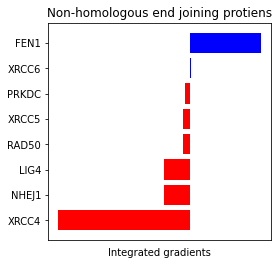

In [3]:
igs[0].shape

print(protein_categories.keys())
key_name = "KEGG_NON_HOMOLOGOUS_END_JOINING"
index = list(protein_categories.keys()).index(key_name)
print(index)
fig = plt.figure(figsize=(4, 4))

first = igs[index]
first_prots = list(protein_categories.values())[index]
# sort : 
sorted_indices = np.argsort(first.cpu())
sorted_strings = np.array(first_prots)[sorted_indices]
sorted_values = first[sorted_indices]
# Plotting each bar individually to assign colors
for i in range(len(sorted_strings)):
    color = 'blue' if sorted_values[i] > 0 else 'red'
    plt.barh(sorted_strings[i], sorted_values[i], color=color)

plt.title('Non-homologous end joining protiens')
plt.xticks([])
plt.xlabel('Integrated gradients')
plt.savefig("../../figures/"+key_name+".png", facecolor='white', dpi=300,bbox_inches='tight')

# TODO: these actually corrolate eiwth known literature...
# some are both blue and red?....

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/ipykernel_launcher.py:24: DtypeWarning: Columns (5286,5287) have mixed types.Specify dtype option on import or set low_memory=False.
/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/ipykernel_launcher.py:31: DtypeWarning: Columns (5286,5287) have mixed types.Specify dtype option on import or set low_memory=False.


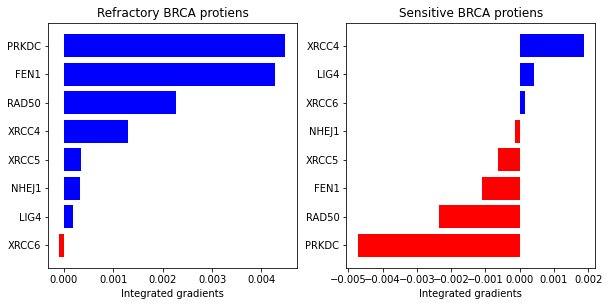

In [4]:
# loop over all attribuests in both sensitive and refractory and plot mean attributes rankings for both ....
    
def get_label_and_ranks(label=0):
    proc_list = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/HGSOC_platinum_responce/process_lists/HGSOC_UAB_hold_out_Metastatic_process_list.csv")
    proc_list = proc_list[["slide_id","label"]]
    proc_list = proc_list[proc_list["label"]==label]

    brca_prots_lists = []
    for idx, row in proc_list.iterrows():
        igs = torch.load("/mnt/ncshare/ozkilim/BRCA/heatmaps/IPS_pathways_heatmaps/heatmap_raw_results/HGSOC_MCAT_UAB_IPS_pathways/Unspecified/" + row["slide_id"] + "/attributions_ig.pt")
        first = igs[index]
        brca_prots_lists.append(first.cpu().numpy())

    brca_prots_lists = np.array(brca_prots_lists)
    first_all  = np.mean(brca_prots_lists,axis=0)
    first_prots = list(protein_categories.values())[index]
    sorted_indices = np.argsort(first_all)
    sorted_strings = np.array(first_prots)[sorted_indices]
    sorted_values = first_all[sorted_indices]
    return sorted_values, sorted_strings

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9.8, 4.5))  # Adjust the figsize as needed

sorted_values, sorted_strings = get_label_and_ranks(label=0)
# Plot on the first axis (ax1)
for i in range(len(sorted_strings)):
    color = 'blue' if sorted_values[i] > 0 else 'red'
    ax1.barh(sorted_strings[i], sorted_values[i], color=color)


sorted_values, sorted_strings = get_label_and_ranks(label=1)

for i in range(len(sorted_strings)):
    color = 'blue' if sorted_values[i] > 0 else 'red'
    ax2.barh(sorted_strings[i], sorted_values[i], color=color)

# Setting titles for individual plots
ax1.set_title('Refractory BRCA protiens')
ax1.set_xlabel('Integrated gradients')

ax2.set_title('Sensitive BRCA protiens')
ax2.set_xlabel('Integrated gradients')

plt.savefig("../../figures/BRCA_prots_ranking.png", facecolor='white', dpi=300,bbox_inches='tight')

plt.show()

In [5]:
# load 
plat_groups = pd.read_excel("/mnt/ncshare/ozkilim/BRCA/data/HGSOC_processed_data/plat_res_prots.xlsx",header=2)
upreg = plat_groups[plat_groups["Up / down in Pt-resistant cellsc"]=="UP"]
downreg = plat_groups[plat_groups["Up / down in Pt-resistant cellsc"]=="DOWN"]
down_reg_prots = downreg["HUGO Gene symbol"].to_list()
up_reg_prots = upreg["HUGO Gene symbol"].to_list()

In [6]:
# Now find these prots in the igs... link first to names of prots... 

# do over all groups....
sorted_strings
sorted_values

# Splitting the sorted_values into two lists based on up/down regulation
values_up_reg = [value.cpu().numpy() for prot, value in zip(sorted_strings, sorted_values) if prot in up_reg_prots]
values_down_reg = [value.cpu().numpy() for prot, value in zip(sorted_strings, sorted_values) if prot in down_reg_prots]

# Plotting
fig, ax = plt.subplots()
ax.boxplot([values_up_reg, values_down_reg], labels=['Up Regulated', 'Down Regulated'], patch_artist=True)

# Customizations
plt.title('Boxplot of Protein Values')
plt.ylabel('Values')
plt.grid(False)  # Optionally hide the grid for a cleaner look.

plt.show()

AttributeError: 'numpy.float64' object has no attribute 'cpu'

NameError: name 'ax' is not defined

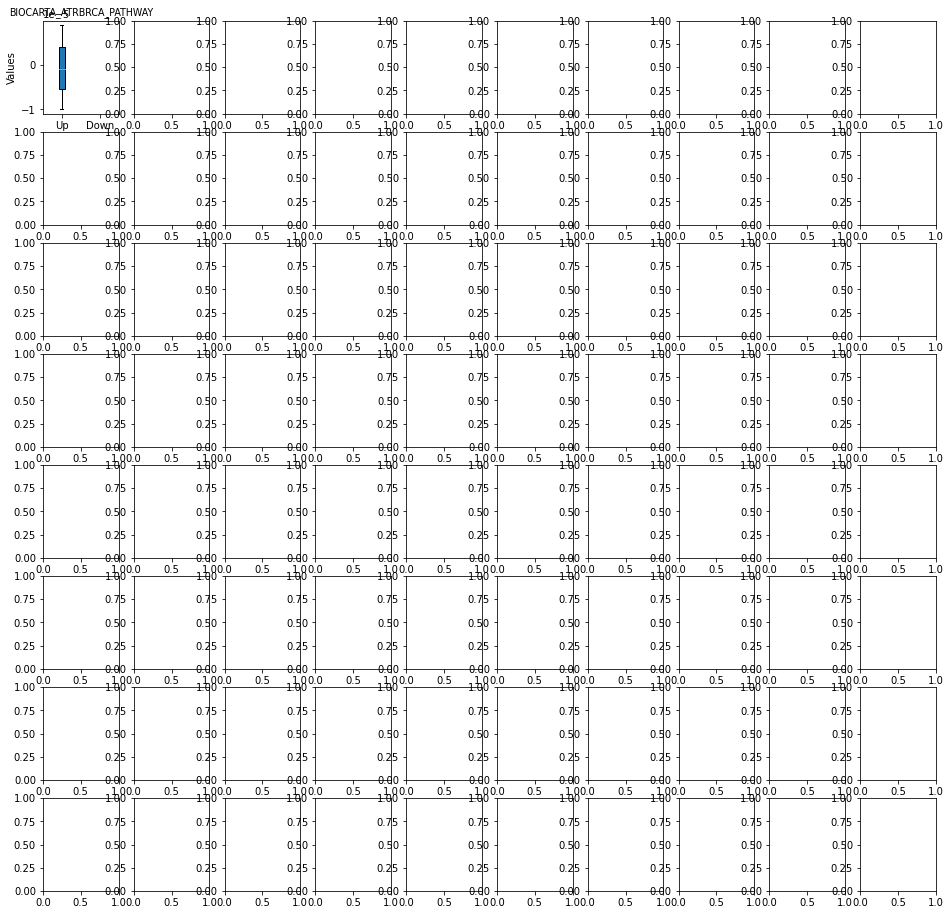

In [7]:
import matplotlib.pyplot as plt

# Initialize a figure with 8 rows and 10 columns
fig, axs = plt.subplots(8, 10, figsize=(16, 16))
all_values = []
all_names = []
for i in range(len(igs)):
    values = igs[i]
    names = list(protein_categories.values())[i]
    pathways = list(protein_categories.keys())[i]

    all_values.append(values.cpu().numpy())
    all_names.append(names)
    # make larger list .... 

    values_up_reg = [value for prot, value in zip(names, values.cpu().numpy()) if prot in up_reg_prots]
    values_down_reg = [value for prot, value in zip(names, values.cpu().numpy()) if prot in down_reg_prots]

    # Calculate subplot index
    row = i // 10  # Row index
    col = i % 10    # Column index

    # Plot on the corresponding subplot
    axs[row, col].boxplot([values_up_reg, values_down_reg], labels=['Up', 'Down'], patch_artist=True)

    # Customizations
    axs[row, col].set_title(pathways,fontsize=9.5)
    axs[row, col].set_ylabel('Values')
    axs[row, col].grid(False)  # Optionally hide the grid for a cleaner look
    ax.set_ylim([-0.0004, -0.0006])
    axs[row, col].set_yticks([])

plt.suptitle("Proteomic integrated gradiants vs literature defined up/ down reguation of platinum resistant cells.", y=1, fontsize=15)  # Adjust layout to prevent overlap of subplots
plt.tight_layout()  # Adjust layout to prevent overlap of subplots
output_file = "/mnt/ncshare/ozkilim/BRCA/figures/IG_proteins_vs_lit.png"
plt.savefig(output_file, bbox_inches='tight', dpi=300, facecolor=fig.get_facecolor())  # Save with high resolution
plt.show()

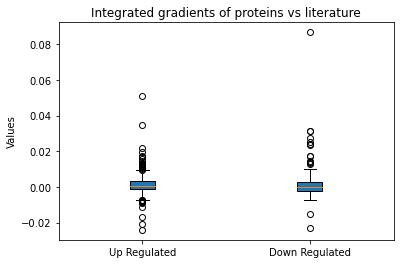

In [ ]:
# # loop over all and create one giant list ....
all_names = [item for sublist in all_names for item in sublist]
all_values = [item for sublist in all_values for item in sublist]

# Splitting the sorted_values into two lists based on up/down regulation
values_up_reg = [value for prot, value in zip(all_names, all_values) if prot in up_reg_prots]
values_down_reg = [value for prot, value in zip(all_names, all_values) if prot in down_reg_prots]

# Plotting
fig, ax = plt.subplots()
ax.boxplot([values_up_reg, values_down_reg], labels=['Up Regulated', 'Down Regulated'], patch_artist=True)

# Customizations
plt.title('Integrated gradients of proteins vs literature')
plt.ylabel('Values')
plt.grid(False)  # Optionally hide the grid for a cleaner look
plt.show()